In [83]:
import torch
import numpy as np

## 2.2 数据操作

### 2.2.1创建 `tensor`

In [5]:
# 创建⼀个5x3的未初始化的 Tensor
x = torch.empty(5,3)
x

tensor([[9.9184e-39, 8.7245e-39, 9.2755e-39],
        [8.9082e-39, 9.9184e-39, 8.4490e-39],
        [9.6429e-39, 1.0653e-38, 1.0469e-38],
        [4.2246e-39, 1.0378e-38, 9.6429e-39],
        [9.2755e-39, 9.7346e-39, 1.0745e-38]])

In [10]:
# 创建⼀个5x3的随机初始化的 Tensor :
x = torch.rand(5,3)
x

tensor([[0.4496, 0.0336, 0.3475],
        [0.5923, 0.2153, 0.8279],
        [0.4446, 0.3286, 0.7065],
        [0.7721, 0.6562, 0.4355],
        [0.2791, 0.8337, 0.1916]])

In [12]:
# 创建⼀个5x3的long型全0的 Tensor :
x = torch.zeros(5,3,dtype = torch.long)
x

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])

In [6]:
# 直接创建
x = torch.tensor([5.5,2])
x

tensor([5.5000, 2.0000])

In [10]:
# 通过现有的tensor插件，会默认重用输入tensor的一些属性，如数据类型等，除非自定义数据类型
x = x.new_ones(5, 3, dtype = torch.float64)
# 返回的tensor默认具有相同的torch.dtype和torch.device
x

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)

In [12]:
# 制定新的数据类型
x = torch.randn_like(x, dtype=torch.float)
x

tensor([[ 5.8216e-02, -7.3244e-01, -7.2631e-01],
        [ 2.2480e+00,  4.3884e-01, -3.3377e-01],
        [ 1.9736e+00,  7.4171e-01,  2.4990e-01],
        [ 6.7954e-01, -1.7059e+00,  1.8729e-01],
        [ 3.0848e-01,  2.1080e-03,  1.2143e+00]])

In [14]:
# 可以通过哦shape,size()来获取tensor的形状
x.size(),x.shape

(torch.Size([5, 3]), torch.Size([5, 3]))

> 注意：返回的torch.Size其实就是一个tuple, 支持所有tuple的操作。 

还有很多函数可以创建`Tensor`，去翻翻官方API就知道了，下表给了一些常用的作参考。

|函数|功能|
|:---:|:---:|
|Tensor(*sizes)|基础构造函数|
|tensor(data,)|类似np.array的构造函数|
|ones(*sizes)|全1Tensor|
|zeros(*sizes)|全0Tensor|
|eye(*sizes)|对角线为1，其他为0|
|arange(s,e,step)|从s到e，步长为step|
|linspace(s,e,steps)|从s到e，均匀切分成steps份|
|rand/randn(*sizes)|均匀/标准分布|
|normal(mean,std)/uniform(from,to)|正态分布/均匀分布|
|randperm(m)|随机排列|

这些创建方法都可以在创建的时候指定数据类型dtype和存放device(cpu/gpu)。

## 2.2.2 操作

### 加法

In [23]:
y = torch.rand(5,3)
y = torch.rand(5,3)

# 加法形式1：
print(x + y )

# 加法形式2：
print(torch.add(x,y))
#还可以指定输出
res = torch.empty(5,3)
torch.add(x,y,out=res)
print(res)

# 加法形式3：
y.add_(x)
y

tensor([[ 0.0719,  0.2269, -0.7175],
        [ 2.5992,  0.6161, -0.2806],
        [ 2.2163,  1.0230,  0.2533],
        [ 1.0392, -1.0469,  0.3603],
        [ 1.0761,  0.2050,  1.5645]])
tensor([[ 0.0719,  0.2269, -0.7175],
        [ 2.5992,  0.6161, -0.2806],
        [ 2.2163,  1.0230,  0.2533],
        [ 1.0392, -1.0469,  0.3603],
        [ 1.0761,  0.2050,  1.5645]])
tensor([[ 0.0719,  0.2269, -0.7175],
        [ 2.5992,  0.6161, -0.2806],
        [ 2.2163,  1.0230,  0.2533],
        [ 1.0392, -1.0469,  0.3603],
        [ 1.0761,  0.2050,  1.5645]])


tensor([[ 0.0719,  0.2269, -0.7175],
        [ 2.5992,  0.6161, -0.2806],
        [ 2.2163,  1.0230,  0.2533],
        [ 1.0392, -1.0469,  0.3603],
        [ 1.0761,  0.2050,  1.5645]])

### 索引

In [26]:
# 索引出来的结果与原数据共享内存，也即修改⼀个，另⼀个会跟着修改
y = x[0,:]
y += 1

y,x[0,:]

(tensor([2.0582, 1.2676, 1.2737]), tensor([2.0582, 1.2676, 1.2737]))

In [31]:
y = torch.index_select(x,1,2,*,y)
y

SyntaxError: invalid syntax (<ipython-input-31-a7743ddc4e52>, line 1)

除了常用的索引选择数据之外，PyTorch还提供了一些高级的选择函数:

|函数|	功能|
|:---:|:---:|
|index_select(input, dim, index)|在指定维度dim上选取，比如选取某些行、某些列|
|masked_select(input, mask)|例子如上，a[a>0]，使用ByteTensor进行选取|
|nonzero(input)|	非0元素的下标|
|gather(input, dim, index)|根据index，在dim维度上选取数据，输出的size与index一样|

这里不详细介绍，用到了再查官方文档。

### 改变形状

In [35]:
# view()返回的新tensor与源tensor共享内存
# view仅改变了观察方式
y = x.view(15)
z = x.view(-1,5)

x.size(),y.size(),z.size()

(torch.Size([5, 3]), torch.Size([15]), torch.Size([3, 5]))

In [37]:
x += 1

print(x)
print(y)

tensor([[4.0582, 3.2676, 3.2737],
        [4.2480, 2.4388, 1.6662],
        [3.9736, 2.7417, 2.2499],
        [2.6795, 0.2941, 2.1873],
        [2.3085, 2.0021, 3.2143]])
tensor([4.0582, 3.2676, 3.2737, 4.2480, 2.4388, 1.6662, 3.9736, 2.7417, 2.2499,
        2.6795, 0.2941, 2.1873, 2.3085, 2.0021, 3.2143])


In [39]:
# 如果我们想返回⼀个真正新的副本（即不共享内存）
#Pytorch还提供了⼀个 reshape() 可以改变形状，但是此函数并不能保证返回的是其拷⻉，所以不推荐使⽤
# 推荐先⽤ clone 创造⼀个副本然后再使⽤ view

x_cp = x.clone().view(15)
x -= 1

print(x)
print(x_cp)

tensor([[ 3.0582,  2.2676,  2.2737],
        [ 3.2480,  1.4388,  0.6662],
        [ 2.9736,  1.7417,  1.2499],
        [ 1.6795, -0.7059,  1.1873],
        [ 1.3085,  1.0021,  2.2143]])
tensor([4.0582, 3.2676, 3.2737, 4.2480, 2.4388, 1.6662, 3.9736, 2.7417, 2.2499,
        2.6795, 0.2941, 2.1873, 2.3085, 2.0021, 3.2143])


> 使用`clone`还有一个好处是会被记录在计算图中，即梯度回传到副本时也会传到源`Tensor`。

In [46]:
# item()将一个标量tensor转变成numpy
# only one element tensors can be converted to Python scalars
x = torch.randn(1)
x,x.item()

(tensor([-0.4378]), -0.4377901256084442)

### 线性代数
另外，PyTorch还支持一些线性函数，这里提一下，免得用起来的时候自己造轮子，具体用法参考官方文档。如下表所示：

| 函数	|功能|
|:---:|:---:|
|trace|	对角线元素之和(矩阵的迹)|
|diag|	对角线元素|
|triu/tril	|矩阵的上三角/下三角，可指定偏移量|
|mm/bmm	|矩阵乘法，batch的矩阵乘法|
|addmm/addbmm/addmv/addr/baddbmm..|	矩阵运算|
|t|转置|
|dot/cross|	内积/外积|
|inverse	|求逆矩阵|
|svd	|奇异值分解|

## 2.2.3 广播机制

前面我们看到如何对两个形状相同的`Tensor`做按元素运算。

当对两个形状不同的`Tensor`按元素运算时，可能会触发广播（broadcasting）机制：

先适当复制元素使这两个`Tensor`形状相同后再按元素运算。

In [68]:
x = torch.arange(1, 3).view(1, 2)
print(x)
y = torch.arange(1, 4).view(3, 1)
print(y)
print(x + y)

(tensor([[1],
         [2]]),
 tensor([[1, 2, 3, 4]]),
 tensor([[2, 3, 4, 5],
         [3, 4, 5, 6]]))

由于 x 和 y 分别是1⾏2列和3⾏1列的矩阵，如果要计算 x + y ，那么 x 中第⼀⾏的2个元素被⼴播
（复制）到了第⼆⾏和第三⾏，⽽ y 中第⼀列的3个元素被⼴播（复制）到了第⼆列。如此，就可以对2
个3⾏2列的矩阵按元素相加

### 2.2.4运算的内存开销

前⾯说了，索引、 view 是不会开辟新内存的，⽽像 y = x + y 这样的运算是会新开内存的，然后将 y 指向新内存为了演示这⼀点，我们可以使⽤Python⾃带的 id 函数：如果两个实例的ID⼀致，那么它们所对应的内存地址相同；反之则不同

In [76]:
x = torch.tensor([1, 2])
y = torch.tensor([3, 4])
y_id = id(y)
y = y + x
y_id_ = id(y)

y_id,y_id_,y_id - y_id_

(2629405413312, 2629405490496, -77184)

如果想指定结果到原来的 y 的内存，我们可以使⽤前⾯介绍的索引来进⾏替换操作。在下⾯的例⼦中，我们把 x + y 的结果通过 [:] 写进 y 对应的内存中。

In [78]:
x = torch.tensor([1, 2])
y = torch.tensor([3, 4])
y_id = id(y)
y[:] = y + x
y_id_ = id(y)

y_id,y_id_,y_id - y_id_

(2629405488448, 2629405488448, 0)

我们还可以使⽤运算符全名函数中的 out 参数或者⾃加运算符 += (也即 add_() )达到上述效果，例如
torch.add(x, y, out=y) 和 y += x ( y.add_(x) )。

In [81]:
x = torch.tensor([1, 2])
y = torch.tensor([3, 4])
y_id = id(y)
torch.add(x,y,out=y)# or y += x, y.add_(x)
y_id_ = id(y)

y_id,y_id_,y_id == y_id

(2629405519360, 2629405519360, True)

### 2.2.5 TENSOR 和NUMPY相互转换

Notes: tensor和numpy中的数组也共享内存,（所以他们之间的转换很
快），改变其中⼀个时另⼀个也会改变！！

#### numpy中的array转换成tensor
需要注意的是，此⽅法总是会进⾏数据拷⻉（就会消耗更多的时间和空间），所以返回的 Tensor 和原来的数
据不再共享内存。


In [101]:
a = np.ones(3)
b = torch.from_numpy(a)

a += 1
a,b

(array([2., 2., 2.]), tensor([2., 2., 2.], dtype=torch.float64))

In [103]:
# 法2
b = torch.tensor(a)

a,b

(array([2., 2., 2.]), tensor([2., 2., 2.], dtype=torch.float64))

所有在CPU上的 Tensor （除了 CharTensor ）都⽀持与NumPy数组相互转换

#### tensor转numpy

In [94]:
a = torch.ones(2)
b = a.numpy()

a += 1

a,b

(tensor([2., 2.]), array([2., 2.], dtype=float32))

### 2.2.6 TENSOR ON GPU
用方法`to()`可以将`Tensor`在CPU和GPU（需要硬件支持）之间相互移动。


In [105]:
# 以下代码只有在PyTorch GPU版本上才会执行
if torch.cuda.is_available():
    device = torch.device("cuda")          # GPU
    y = torch.ones_like(x, device=device)  # 直接创建一个在GPU上的Tensor
    x = x.to(device)                       # 等价于 .to("cuda")
    z = x + y
    print(z)
    print(z.to("cpu", torch.double))       # to()还可以同时更改数据类型

## 2.3 ⾃动求梯度

在深度学习中，我们经常需要对函数求梯度（gradient）。PyTorch提供的autograd 包能够根据输⼊
和前向传播过程⾃动构建计算图，并执⾏反向传播。

### 2.3.1 概念

上一节介绍的`Tensor`是这个包的核心类，如果将其属性`.requires_grad`设置为`True`，它将开始追踪(track)在其上的所有操作（这样就可以利用链式法则进行梯度传播了）。完成计算后，可以调用`.backward()`来完成所有梯度计算。此`Tensor`的梯度将累积到`.grad`属性中。
> 注意在`y.backward()`时，如果`y`是标量，则不需要为`backward()`传入任何参数；否则，需要传入一个与`y`同形的`Tensor`。解释见 2.3.2 节。

如果不想要被继续追踪，可以调⽤ .detach() 将其从追踪记录中分离出来，这样就可以防⽌将来的计算被追踪，这样梯度就传不过去了。此外，还可以⽤ with torch.no_grad() 将不想被追踪的操作代码块包裹起来，这种⽅法在评估模型的时候很常⽤，因为在评估模型时，我们并不需要计算可训练参数（ requires_grad=True ）的梯度。

Function 是另外⼀个很᯿要的类。 Tensor 和 Function 互相结合就可以构建⼀个记录有整个计算过程的有向⽆环图（DAG）。每个 Tensor 都有⼀个 .grad_fn 属性，该属性即创建该 Tensor 的Function , 就是说该 Tensor 是不是通过某些运算得到的，若是，则 grad_fn 返回⼀个与这些运算相关的对象，否则是None。

## 2.3.2 `Tensor`

In [115]:
# 即把x当做变量
x = torch.ones(2,2,requires_grad = True)
x,x.grad_fn

(tensor([[1., 1.],
         [1., 1.]], requires_grad=True),
 None)

In [117]:
# 做一下运算

y = x +2
y,y.grad_fn

(tensor([[3., 3.],
         [3., 3.]], grad_fn=<AddBackward0>),
 <AddBackward0 at 0x26434c83be0>)

注意x是直接创建的，所以它没有 grad_fn , ⽽y是通过⼀个加法操作创建的，所以它有⼀个为
<AddBackward> 的 grad_fn 

In [118]:
# 像x这种直接创建的称为叶⼦节点，叶⼦节点对应的 grad_fn 是 None 。
print(x.is_leaf,y.is_leaf)

True False


In [123]:
# 可以从grad_fn看出本次的操作 or 运算
z = y ** 2 * 3
out = z.mean()

print(z)
print(z.grad_fn)
print()
print(out)
print(out.grad_fn)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>)

tensor(27., grad_fn=<MeanBackward0>)


通过`.requires_grad_()`来用in-place的方式改变`requires_grad`属性：


In [124]:
a = torch.randn(2, 2) # 缺失情况下默认 requires_grad = False
a = ((a * 3) / (a - 1))
print(a.requires_grad) # False
a.requires_grad_(True)
print(a.requires_grad) # True
b = (a * a).sum()
print(b.grad_fn)

False
True


## 2.3.3 梯度


In [126]:
#  因为 out 是⼀个标量，所以调⽤ backward() 时不需要指定求导变量
out.backward()

 我们来看看`out`关于`x`的梯度 $\frac{d(out)}{dx}$:


In [127]:
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


我们令`out`为 $o$ , 因为
$$
o=\frac14\sum_{i=1}^4z_i=\frac14\sum_{i=1}^43(x_i+2)^2
$$
所以
$$
\frac{\partial{o}}{\partial{x_i}}\bigr\rvert_{x_i=1}=\frac{9}{2}=4.5
$$
所以上面的输出是正确的。

数学上，如果有一个函数值和自变量都为向量的函数 $\vec{y}=f(\vec{x})$, 那么 $\vec{y}$ 关于 $\vec{x}$ 的梯度就是一个雅可比矩阵（Jacobian matrix）:
$$
J=\left(\begin{array}{ccc}
   \frac{\partial y_{1}}{\partial x_{1}} & \cdots & \frac{\partial y_{1}}{\partial x_{n}}\\
   \vdots & \ddots & \vdots\\
   \frac{\partial y_{m}}{\partial x_{1}} & \cdots & \frac{\partial y_{m}}{\partial x_{n}}
   \end{array}\right)
$$
而``torch.autograd``这个包就是用来计算一些雅克比矩阵的乘积的。例如，如果 $v$ 是一个标量函数的 $l=g\left(\vec{y}\right)$ 的梯度：
$$
v=\left(\begin{array}{ccc}\frac{\partial l}{\partial y_{1}} & \cdots & \frac{\partial l}{\partial y_{m}}\end{array}\right)
$$
那么根据链式法则我们有 $l$ 关于 $\vec{x}$ 的雅克比矩阵就为:
$$
v J=\left(\begin{array}{ccc}\frac{\partial l}{\partial y_{1}} & \cdots & \frac{\partial l}{\partial y_{m}}\end{array}\right) \left(\begin{array}{ccc}
   \frac{\partial y_{1}}{\partial x_{1}} & \cdots & \frac{\partial y_{1}}{\partial x_{n}}\\
   \vdots & \ddots & \vdots\\
   \frac{\partial y_{m}}{\partial x_{1}} & \cdots & \frac{\partial y_{m}}{\partial x_{n}}
   \end{array}\right)=\left(\begin{array}{ccc}\frac{\partial l}{\partial x_{1}} & \cdots & \frac{\partial l}{\partial x_{n}}\end{array}\right)
$$

注意：grad在反向传播过程中是累加的(accumulated)，这意味着每一次运行反向传播，梯度都会累加之前的梯度，所以一般在反向传播之前需把梯度清零。

In [132]:
#再来一次反向传播，注意grad是累加的

out2 = x.sum()
out2.backward()
print(x.grad)

out3 = x.sum()
x.grad.data.zero_()
out3.backward()
print(x.grad)

tensor([[2., 2.],
        [2., 2.]])
tensor([[1., 1.],
        [1., 1.]])



> 现在我们解释2.3.1节留下的问题，为什么在`y.backward()`时，如果`y`是标量，则不需要为`backward()`传入任何参数；否则，需要传入一个与`y`同形的`Tensor`?
简单来说就是为了避免向量（甚至更高维张量）对张量求导，而转换成标量对张量求导。举个例子，假设形状为 `m x n` 的矩阵 X 经过运算得到了 `p x q` 的矩阵 Y，Y 又经过运算得到了 `s x t` 的矩阵 Z。那么按照前面讲的规则，dZ/dY 应该是一个 `s x t x p x q` 四维张量，dY/dX 是一个 `p x q x m x n`的四维张量。问题来了，怎样反向传播？怎样将两个四维张量相乘？？？这要怎么乘？？？就算能解决两个四维张量怎么乘的问题，四维和三维的张量又怎么乘？导数的导数又怎么求，这一连串的问题，感觉要疯掉…… 
为了避免这个问题，我们**不允许张量对张量求导，只允许标量对张量求导，求导结果是和自变量同形的张量**。所以必要时我们要**把张量通过将所有张量的元素加权求和的方式转换为标量**，举个例子，假设`y`由自变量`x`计算而来，`w`是和`y`同形的张量，则`y.backward(w)`的含义是：先计算`l = torch.sum(y * w)`，则`l`是个标量，然后求`l`对自变量`x`的导数。
[参考](https://zhuanlan.zhihu.com/p/29923090)

In [134]:
#Only Tensors of floating point and complex dtype can require gradients
x = torch.tensor([1.,2.,3.,4.],requires_grad=True)
y = 2 * x
z = y.view(2,2)
z

tensor([[2., 4.],
        [6., 8.]], grad_fn=<ViewBackward>)

现在 z 不是⼀个标量，所以在调⽤ backward 时需要传⼊⼀个和z同形的权重向量进⾏加权求和得到
⼀个标量

In [136]:
v = torch.tensor([[1.0, 0.1], [0.01, 0.001]], dtype=torch.float)
z.backward(v)
print(x.grad)
# 注意， x.grad 是和 x 同形的张量

tensor([2.0000, 0.2000, 0.0200, 0.0020])


**为什么**

In [144]:
# for question
l = torch.sum(v * z)

In [151]:
# 再来卡看中断梯度的例子：
x = torch.tensor(1.0, requires_grad=True)
y1 = x ** 2
with torch.no_grad():
    y2 = x ** 3
y3 = y1 + y2

print(x.requires_grad)
print(y1, y1.requires_grad)
print(y2, y2.requires_grad)
print(y3, y3.requires_grad)

y3.backward()
print(x.grad) # 只算了y1 part

y2.backward() # 因为requires_grad = false，所以报错

True
tensor(1., grad_fn=<PowBackward0>) True
tensor(1.) False
tensor(2., grad_fn=<AddBackward0>) True
tensor(2.)


RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

此外，如果我们想要修改 tensor 的数值，但是⼜不希望被 autograd 记录（即不会影响反向传播），
那么我么可以对 tensor.data 进⾏操作。

In [152]:
x = torch.ones(1,requires_grad=True)
print(x.data) # 还是⼀个tensor
print(x.data.requires_grad) # 但是已经是独⽴于计算图之外
y = 2 * x
x.data *= 100 # 只改变了值，不会记录在计算图，所以不会影响梯度传播
y.backward()
print(x) # 更改data的值也会影响tensor的值
print(x.grad)

tensor([1.])
False
tensor([100.], requires_grad=True)
tensor([2.])


## 3.1 线性回归

线性回归输出是⼀个连续值，因此适⽤于回归问题。回归问题在实际中很常⻅，如预测房屋价格、⽓
温、销售额等连续值的问题。与回归问题不同，分类问题中模型的最终输出是⼀个离散值。我们所说的
图像分类、垃圾邮件识别、疾病检测等输出为离散值的问题都属于分类问题的范畴。softmax回归则适
⽤于分类问题。
由于线性回归和softmax回归都是单层神经⽹络，它们涉及的概念和技术同样适⽤于⼤多数的深度学习
模型。我们⾸先以线性回归为例，介绍⼤多数深度学习模型的基本要素和表示⽅法。

### 3.1.1 线性回归的基本要素
以⼀个简单的房屋价格预测作为例⼦来解释线性回归的基本要素。这个应⽤的⽬标是预测⼀栋房⼦
的售出价格（元）。我们知道这个价格取决于很多因素，如房屋状况、地段、市场⾏情等。为了简单起
⻅，这⾥我们假设价格只取决于房屋状况的两个因素，即⾯积（平⽅⽶）和房龄（年）。接下来我们希
望探索价格与这两个因素的具体关系
 
### 3.1.1.1 模型定义

设房屋的面积为 $x_1$，房龄为 $x_2$，售出价格为 $y$。我们需要建立基于输入 $x_1$ 和 $x_2$ 来计算输出 $y$ 的表达式，也就是模型（model）。顾名思义，线性回归假设输出与各个输入之间是线性关系：
$$
\hat{y} = x_1 w_1 + x_2 w_2 + b
$$
其中 $w_1$ 和 $w_2$ 是权重（weight），$b$ 是偏差（bias），且均为标量。它们是线性回归模型的参数（parameter）。模型输出 $\hat{y}$ 是线性回归对真实价格 $y$ 的预测或估计。我们通常允许它们之间有一定误差。


### 3.1.1.2 模型训练

接下来我们需要通过数据来寻找特定的模型参数值，使模型在数据上的误差尽可能小。这个过程叫作模型训练（model training）。下面我们介绍模型训练所涉及的3个要素。

#### (1) 训练数据
我们通常收集一系列的真实数据，例如多栋房屋的真实售出价格和它们对应的面积和房龄。我们希望在这个数据上面寻找模型参数来使模型的预测价格与真实价格的误差最小。在机器学习术语里，该数据集被称为训练数据集（training data set）或训练集（training set），一栋房屋被称为一个样本（sample），其真实售出价格叫作标签（label），用来预测标签的两个因素叫作特征（feature）。特征用来表征样本的特点。

假设我们采集的样本数为 $n$，索引为 $i$ 的样本的特征为 $x_1^{(i)}$ 和 $x_2^{(i)}$，标签为 $y^{(i)}$。对于索引为 $i$ 的房屋，线性回归模型的房屋价格预测表达式为
$$
\hat{y}^{(i)} = x_1^{(i)} w_1 + x_2^{(i)} w_2 + b
$$

#### (2) 损失函数

在模型训练中，我们需要衡量价格预测值与真实值之间的误差。通常我们会选取一个非负数作为误差，且数值越小表示误差越小。一个常用的选择是平方函数。它在评估索引为 $i$ 的样本误差的表达式为

$$\ell^{(i)}(w_1, w_2, b) = \frac{1}{2} \left(\hat{y}^{(i)} - y^{(i)}\right)^2$$

其中常数 $\frac 1 2$ 使对平方项求导后的常数系数为1，这样在形式上稍微简单一些。显然，误差越小表示预测价格与真实价格越相近，且当二者相等时误差为0。给定训练数据集，这个误差只与模型参数相关，因此我们将它记为以模型参数为参数的函数。在机器学习里，将衡量误差的函数称为损失函数（loss function）。这里使用的平方误差函数也称为平方损失（square loss）。

通常，我们用训练数据集中所有样本误差的平均来衡量模型预测的质量，即

$$
\ell(w_1, w_2, b) =\frac{1}{n} \sum_{i=1}^n \ell^{(i)}(w_1, w_2, b) =\frac{1}{n} \sum_{i=1}^n \frac{1}{2}\left(x_1^{(i)} w_1 + x_2^{(i)} w_2 + b - y^{(i)}\right)^2
$$

在模型训练中，我们希望找出一组模型参数，记为 $w_1^*, w_2^*, b^*$，来使训练样本平均损失最小：

$$
w_1^*, w_2^*, b^* = \underset{w_1, w_2, b}{\arg\min} \ell(w_1, w_2, b)
$$


#### (3) 优化算法

当模型和损失函数形式较为简单时，上面的误差最小化问题的解可以直接用公式表达出来。这类解叫作解析解（analytical solution）。本节使用的线性回归和平方误差刚好属于这个范畴。然而，大多数深度学习模型并没有解析解，只能通过优化算法有限次迭代模型参数来尽可能降低损失函数的值。这类解叫作数值解（numerical solution）。

在求数值解的优化算法中，小批量随机梯度下降（mini-batch stochastic gradient descent）在深度学习中被广泛使用。它的算法很简单：先选取一组模型参数的初始值，如随机选取；接下来对参数进行多次迭代，使每次迭代都可能降低损失函数的值。在每次迭代中，先随机均匀采样一个由固定数目训练数据样本所组成的小批量（mini-batch）$\mathcal{B}$，然后求小批量中数据样本的平均损失有关模型参数的导数（梯度），最后用此结果与预先设定的一个正数的乘积作为模型参数在本次迭代的减小量。

在训练本节讨论的线性回归模型的过程中，模型的每个参数将作如下迭代：

$$
\begin{aligned}
w_1 &\leftarrow w_1 -   \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \frac{ \partial \ell^{(i)}(w_1, w_2, b)  }{\partial w_1} = w_1 -   \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}}x_1^{(i)} \left(x_1^{(i)} w_1 + x_2^{(i)} w_2 + b - y^{(i)}\right),\\
w_2 &\leftarrow w_2 -   \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \frac{ \partial \ell^{(i)}(w_1, w_2, b)  }{\partial w_2} = w_2 -   \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}}x_2^{(i)} \left(x_1^{(i)} w_1 + x_2^{(i)} w_2 + b - y^{(i)}\right),\\
b &\leftarrow b -   \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \frac{ \partial \ell^{(i)}(w_1, w_2, b)  }{\partial b} = b -   \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}}\left(x_1^{(i)} w_1 + x_2^{(i)} w_2 + b - y^{(i)}\right).
\end{aligned}
$$

在上式中，$|\mathcal{B}|$ 代表每个小批量中的样本个数（批量大小，batch size），$\eta$ 称作学习率（learning rate）并取正数。需要强调的是，这里的批量大小和学习率的值是人为设定的，并不是通过模型训练学出的，因此叫作超参数（hyperparameter）。我们通常所说的“调参”指的正是调节超参数，例如通过反复试错来找到超参数合适的值。在少数情况下，超参数也可以通过模型训练学出。本书对此类情况不做讨论。

### 3.1.1.3 模型预测
模型训练完成后，我们将模型参数 $w_1, w_2, b$ 在优化算法停止时的值分别记作 $\hat{w}_1, \hat{w}_2, \hat{b}$。注意，这里我们得到的并不一定是最小化损失函数的最优解 $w_1^*, w_2^*, b^*$，而是对最优解的一个近似。然后，我们就可以使用学出的线性回归模型 $x_1 \hat{w}_1 + x_2 \hat{w}_2 + \hat{b}$ 来估算训练数据集以外任意一栋面积（平方米）为$x_1$、房龄（年）为$x_2$的房屋的价格了。这里的估算也叫作模型预测、模型推断或模型测试。


## 3.1.2 线性回归的表示方法

我们已经阐述了线性回归的模型表达式、训练和预测。下面我们解释线性回归与神经网络的联系，以及线性回归的矢量计算表达式。

### 3.1.2.1 神经网络图

在深度学习中，我们可以使用神经网络图直观地表现模型结构。为了更清晰地展示线性回归作为神经网络的结构，图3.1使用神经网络图表示本节中介绍的线性回归模型。神经网络图隐去了模型参数权重和偏差。

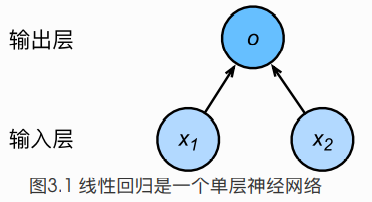



在图3.1所示的神经网络中，输入分别为 $x_1$ 和 $x_2$，因此输入层的输入个数为2。输入个数也叫特征数或特征向量维度。图3.1中网络的输出为 $o$，输出层的输出个数为1。需要注意的是，我们直接将图3.1中神经网络的输出 $o$ 作为线性回归的输出，即 $\hat{y} = o$。由于输入层并不涉及计算，按照惯例，图3.1所示的神经网络的层数为1。所以，线性回归是一个单层神经网络。输出层中负责计算 $o$ 的单元又叫神经元。在线性回归中，$o$ 的计算依赖于 $x_1$ 和 $x_2$。也就是说，输出层中的神经元和输入层中各个输入完全连接。因此，这里的输出层又叫全连接层（fully-connected layer）或稠密层（dense layer）。
